Êï∞ÊçÆÈõÜ‰∏ãËΩΩÔºåÊàñÁõ¥Êé•ËøêË°åÂçïÂÖÉÊ†º2ÂèØ‰ª•Áõ¥Êé•ËØªÂèñ‰∏ãËΩΩÂ•ΩÁöÑÊï∞ÊçÆÔºåÈò≤Ê≠¢ÁΩëÁªúÈóÆÈ¢ò‰∏ãËΩΩÂ§±Ë¥•Êàñ‰∏ãËΩΩÊó∂Èó¥ËøáÈïø

In [31]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
  
# fetch dataset 
individual_household_electric_power_consumption = fetch_ucirepo(id=235) 
  
# data (as pandas dataframes) 
X = individual_household_electric_power_consumption.data.features 
y = individual_household_electric_power_consumption.data.targets 
  
# metadata 
print(individual_household_electric_power_consumption.metadata) 
  
# variable information 
print(individual_household_electric_power_consumption.variables) 

print(X.head())

# ÂêàÂπ∂Êó•ÊúüÂíåÊó∂Èó¥Âàó
X['Datetime'] = pd.to_datetime(X['Date'] + ' ' + X['Time'])
# ËÆæÁΩÆÁ¥¢Âºï
X.set_index('Datetime', inplace=True)

# ‰øùÂ≠òÊï∞ÊçÆÔºå‰øùÁïôÁ¥¢Âºï
X.to_csv('individual_household_electric_power_consumption_features.csv', index=True)

{'uci_id': 235, 'name': 'Individual Household Electric Power Consumption', 'repository_url': 'https://archive.ics.uci.edu/dataset/235/individual+household+electric+power+consumption', 'data_url': 'https://archive.ics.uci.edu/static/public/235/data.csv', 'abstract': 'Measurements of electric power consumption in one household with a one-minute sampling rate over a period of almost 4 years. Different electrical quantities and some sub-metering values are available.', 'area': 'Physics and Chemistry', 'tasks': ['Regression', 'Clustering'], 'characteristics': ['Multivariate', 'Time-Series'], 'num_instances': 2075259, 'num_features': 9, 'feature_types': ['Real'], 'demographics': [], 'target_col': None, 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2006, 'last_updated': 'Fri Mar 08 2024', 'dataset_doi': '10.24432/C58K54', 'creators': ['Georges Hebrail', 'Alice Berard'], 'intro_paper': None, 'additional_info': {'summary': 'This archiv

Áõ¥Êé•ËØªÂèñÂ∑≤Áªè‰∏ãËΩΩÂ•ΩËΩ¨Êç¢‰∏∫csvÁöÑÊï∞ÊçÆÔºåÂáèÂ∞ë‰∏ãËΩΩÊó∂Èó¥
ÂØπÊï∞ÊçÆËøõË°åÈ¢ÑÂ§ÑÁêÜÔºåÊèêÂèñÊó∂Èó¥ÁâπÂæÅÔºåÂ°´ÂÖÖÁº∫Â§±ÂÄºÁ≠â

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# ËØªÂèñÊï∞ÊçÆÔºå‰øùÁïôÊó∂Èó¥Á¥¢Âºï
X = pd.read_csv('individual_household_electric_power_consumption_features.csv', index_col=0, parse_dates=True)

# ÈÄâÂèñglobal_active_power‰Ωú‰∏∫È¢ÑÊµãÁõÆÊ†á
X = X['Global_active_power'].replace('?', np.nan).astype(float) # ÊõøÊç¢Áº∫Â§±ÂÄºÂπ∂ËΩ¨Êç¢‰∏∫floatÁ±ªÂûã
X = X.resample('H').mean()  # ÊåâÂ∞èÊó∂ÈáçÈááÊ†∑Âπ∂ËÆ°ÁÆóÂùáÂÄº

# Handle missing values
X.fillna(method='ffill', inplace=True)      #ÂêëÂâçÂ°´ÂÖÖ
X.fillna(method='bfill', inplace=True)      #ÂêëÂêéÂ°´ÂÖÖ

scaler = MinMaxScaler()  # ÂàõÂª∫ÂΩí‰∏ÄÂåñÂô®
X = scaler.fit_transform(X.values.reshape(-1, 1)).flatten()  # ËÆ≠ÁªÉÈõÜÂΩí‰∏ÄÂåñ



/tmp/ipykernel_90095/735023100.py:6: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  X = pd.read_csv('individual_household_electric_power_consumption_features.csv', index_col=0, parse_dates=True)
/tmp/ipykernel_90095/735023100.py:6: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  X = pd.read_csv('individual_household_electric_power_consumption_features.csv', index_col=0, parse_dates=True)
/tmp/ipykernel_90095/735023100.py:10: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  X = X.resample('H').mean()  # ÊåâÂ∞èÊó∂ÈáçÈááÊ†∑Âπ∂ËÆ°ÁÆóÂùáÂÄº
/tmp/ipykernel_90095/735023100.py:13: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X.fillna(method='ffill', inplace=True)      #ÂêëÂâçÂ°´

ÊªëÂä®Á™óÂè£Ê≥ïÊûÑÂª∫Êó∂Èó¥Â∫èÂàóÊï∞ÊçÆÈõÜ

Â∞ÜÊó∂Èó¥Â∫èÂàóÊï∞ÊçÆÂàíÂàÜ‰∏∫ËæìÂÖ•Â∫èÂàóÂíåÁõÆÊ†áÂÄºÔºåÂΩ¢ÊàêÁõëÁù£Â≠¶‰π†ÁöÑÊï∞ÊçÆ

In [3]:
from torch.utils.data import Dataset
import torch

# ÊûÑÂª∫Êó∂Â∫èÊï∞ÊçÆÈõÜÔºåËæìÂÖ•‰∏∫Ââçseq_lenÔºåËæìÂá∫‰∏∫Á¨¨seq_len+1
class SequenceDataset(Dataset):
    def __init__(self, data, seq_len=24):
        self.data = data  # ÂΩí‰∏ÄÂåñÂêéÁöÑ‰∏ÄÁª¥Êï∞ÁªÑ
        self.seq_len = seq_len  # Â∫èÂàóÈïøÂ∫¶ÔºàÂ¶Ç24Â∞èÊó∂Ôºâ

    def __len__(self):
        return len(self.data) - self.seq_len  # ÂèØÁî®Ê†∑Êú¨Êï∞

    def __getitem__(self, idx):
        x = self.data[idx:idx+self.seq_len]  # ËæìÂÖ•Â∫èÂàó
        y = self.data[idx+self.seq_len]      # ÁõÆÊ†áÂÄº
        return torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)
    
# Â∞ÜÂΩí‰∏ÄÂåñÂêéÁöÑÊï∞ÊçÆÂàÜÂâ≤‰∏∫ËÆ≠ÁªÉÈõÜÂíåÈ™åËØÅÈõÜ
train_size = int(len(X) * 0.8)
X_train = X[:train_size]
X_val = X[train_size:]
print(f"ËÆ≠ÁªÉÈõÜÂ§ßÂ∞è: {len(X_train)}")
print(f"È™åËØÅÈõÜÂ§ßÂ∞è: {len(X_val)}")

batch_size = 1024
# ÂàõÂª∫ËÆ≠ÁªÉÂíåÈ™åËØÅÊï∞ÊçÆÈõÜ
train_dataset = SequenceDataset(X_train, seq_len=24)        #Ââç24Â∞èÊó∂È¢ÑÊµãÁ¨¨25Â∞èÊó∂
val_dataset = SequenceDataset(X_val, seq_len=24)        #Ââç24Â∞èÊó∂È¢ÑÊµãÁ¨¨25Â∞èÊó∂

NameError: name 'X' is not defined

lstmÊ®°ÂûãÂÆö‰πâ‰∏éÈ¢ÑÊµã

In [2]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split, ParameterGrid, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
import torch.nn.functional as F
import matplotlib.pyplot as plt
import warnings
from tqdm import tqdm
warnings.filterwarnings('ignore')
# ËÆæÁΩÆ‰∏≠ÊñáÂ≠ó‰ΩìÔºåÁî®‰∫éÂõæË°®ÊòæÁ§∫
plt.rcParams['font.sans-serif'] = ['SimHei']
# ËÆæÁΩÆÊ≠£Â∏∏ÊòæÁ§∫Ë¥üÂè∑
plt.rcParams['axes.unicode_minus'] = True

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=8, pin_memory=True)     
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=8, pin_memory=True)

# ‰ºòÂåñÁöÑLSTMÊ®°Âûã
class LSTMModel(nn.Module):
    def __init__(self, input_size=1, hidden_size=128, num_layers=3, dropout=0.2):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        # LSTMÂ±ÇÔºåÊ∑ªÂä†dropout
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, 
                           batch_first=True, dropout=dropout if num_layers > 1 else 0)
        # Â§öÂ±ÇÂÖ®ËøûÊé•ÁΩëÁªú
        self.fc1 = nn.Linear(hidden_size, hidden_size // 2)
        self.fc2 = nn.Linear(hidden_size // 2, 1)
        self.dropout = nn.Dropout(dropout)
        self.relu = nn.ReLU()       # ÊøÄÊ¥ªÂáΩÊï∞Â±ÇÔºåÂ¢ûÂä†ÁΩëÁªúÁöÑÈùûÁ∫øÊÄßË°®ËææËÉΩÂäõÔºå‰ΩøÊ®°ÂûãËÉΩÂ§üÊãüÂêàÊõ¥Â§çÊùÇÁöÑÊï∞ÊçÆÂÖ≥Á≥ª„ÄÇ

    def forward(self, x):
        x = x.unsqueeze(-1)    # (batch, seq_len, 1)
        # LSTMÂâçÂêë‰º†Êí≠
        out, _ = self.lstm(x)
        out = out[:, -1, :]    # ÂèñÊúÄÂêé‰∏Ä‰∏™Êó∂Èó¥Ê≠•
        # Â§öÂ±ÇÂÖ®ËøûÊé• + dropout
        out = self.dropout(out)
        out = self.relu(self.fc1(out))
        out = self.dropout(out)
        out = self.fc2(out)
        return out

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"‰ΩøÁî®ËÆæÂ§á: {device}")
# ÂàõÂª∫Ê®°Âûã
model = LSTMModel(input_size=1, hidden_size=128, num_layers=3, dropout=0.2).to(device)
# ËÆ°ÁÆóÊ®°ÂûãÂèÇÊï∞Èáè
total_params = sum(p.numel() for p in model.parameters())
print(f"Ê®°ÂûãÂèÇÊï∞Èáè: {total_params:,}")
# ‰ºòÂåñÂô®Ê∑ªÂä†ÊùÉÈáçË°∞Âáè
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)
loss_fn = nn.MSELoss()
# Â≠¶‰π†ÁéáË∞ÉÂ∫¶Âô®
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=3, factor=0.5)

# ËÆ≠ÁªÉÂæ™ÁéØ
num_epochs = 50
train_losses = []
val_losses = []
best_val_loss = float('inf')
patience_counter = 0
patience = 5
for epoch in range(num_epochs):
    # ============ ËÆ≠ÁªÉÈò∂ÊÆµ ============
    model.train()
    train_loss = 0
    train_batches = 0
    
    # ËÆ≠ÁªÉËøõÂ∫¶Êù°
    train_pbar = tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs} [Train]', 
                      ncols=100, leave=False)
    for x, y in train_pbar:
        x, y = x.to(device, non_blocking=True), y.to(device, non_blocking=True)
        optimizer.zero_grad()
        y_pred = model(x).squeeze()
        loss = loss_fn(y_pred, y)
        loss.backward()
        # Ê¢ØÂ∫¶Ë£ÅÂâ™Èò≤Ê≠¢Ê¢ØÂ∫¶ÁàÜÁÇ∏
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        train_loss += loss.item()
        train_batches += 1
        
        # Êõ¥Êñ∞ËøõÂ∫¶Êù°ÊòæÁ§∫ÂΩìÂâçloss
        train_pbar.set_postfix({'Loss': f'{loss.item():.6f}'})
    
    avg_train_loss = train_loss / train_batches
    
    # ============ È™åËØÅÈò∂ÊÆµ ============
    model.eval()
    val_loss = 0
    val_batches = 0
    
    # È™åËØÅËøõÂ∫¶Êù°
    val_pbar = tqdm(val_loader, desc=f'Epoch {epoch+1}/{num_epochs} [Val]', 
                    ncols=100, leave=False)
    with torch.no_grad():
        for x, y in val_pbar:
            x, y = x.to(device, non_blocking=True), y.to(device, non_blocking=True)
            y_pred = model(x).squeeze()
            loss = loss_fn(y_pred, y)
            val_loss += loss.item()
            val_batches += 1
            
            # Êõ¥Êñ∞È™åËØÅËøõÂ∫¶Êù°
            val_pbar.set_postfix({'Loss': f'{loss.item():.6f}'})
    
    avg_val_loss = val_loss / val_batches
    # Â≠¶‰π†ÁéáË∞ÉÂ∫¶
    scheduler.step(avg_val_loss)
    # ËÆ∞ÂΩïÊçüÂ§±
    train_losses.append(avg_train_loss)
    val_losses.append(avg_val_loss)
    
    # Êó©ÂÅúÊ£ÄÊü•
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        patience_counter = 0
        # ‰øùÂ≠òÊúÄ‰Ω≥Ê®°Âûã
        torch.save(model.state_dict(), 'best_model.pth')
        best_epoch = epoch + 1
    else:
        patience_counter += 1
    
    # ÊòæÁ§∫epochÁªìÊûú
    current_lr = optimizer.param_groups[0]['lr']
    print(f'Epoch {epoch+1}/{num_epochs} | Train Loss: {avg_train_loss:.6f} | Val Loss: {avg_val_loss:.6f} | LR: {current_lr:.6f}')
    
    # Êó©ÂÅú
    if patience_counter >= patience:
        print(f"Êó©ÂÅú‰∫éepoch {epoch+1}ÔºåÊúÄ‰Ω≥Ê®°ÂûãÂú®epoch {best_epoch}")
        break

print(f"\nËÆ≠ÁªÉÂÆåÊàêÔºÅ")
print(f"ÊúÄ‰Ω≥È™åËØÅÊçüÂ§±: {best_val_loss:.6f} (epoch {best_epoch})")

# Âä†ËΩΩÊúÄ‰Ω≥Ê®°Âûã
model.load_state_dict(torch.load('best_model.pth'))

# ÂèØËßÜÂåñËÆ≠ÁªÉËøáÁ®ã
plt.figure(figsize=(15, 5))
# ÊçüÂ§±Êõ≤Á∫ø
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='ËÆ≠ÁªÉÊçüÂ§±', color='blue')
plt.plot(val_losses, label='È™åËØÅÊçüÂ§±', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('ËÆ≠ÁªÉËøáÁ®ãÊçüÂ§±ÂèòÂåñ')
plt.legend()
plt.grid(True)
# ËøáÊãüÂêàÂàÜÊûê
plt.subplot(1, 2, 2)
overfitting_ratio = [v/t if t > 0 else 1 for t, v in zip(train_losses, val_losses)]
plt.plot(overfitting_ratio, label='È™åËØÅ/ËÆ≠ÁªÉÊçüÂ§±ÊØî', color='green')
plt.axhline(y=1.2, color='orange', linestyle='--', label='ËøáÊãüÂêàË≠¶ÊàíÁ∫ø')
plt.xlabel('Epoch')
plt.ylabel('ÊØîÂÄº')
plt.title('ËøáÊãüÂêàÁõëÊéß')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# ÊÄßËÉΩÊÄªÁªì
print("\n=== ËÆ≠ÁªÉÊÄªÁªì ===")
print(f"ÊúÄÁªàËÆ≠ÁªÉÊçüÂ§±: {train_losses[-1]:.6f}")
print(f"ÊúÄÁªàÈ™åËØÅÊçüÂ§±: {val_losses[-1]:.6f}")
print(f"ÊúÄ‰Ω≥È™åËØÅÊçüÂ§±: {best_val_loss:.6f}")
print(f"ËøáÊãüÂêàÁ®ãÂ∫¶: {val_losses[-1]/train_losses[-1]:.2f} ({'Ê≠£Â∏∏' if val_losses[-1]/train_losses[-1] < 1.5 else 'ÂèØËÉΩËøáÊãüÂêà'})")
print(f"Ê®°ÂûãÂ∑≤‰øùÂ≠ò‰∏∫: best_model.pth")



# Âú®È™åËØÅÈõÜ‰∏äËØÑ‰º∞
model.eval()  # ËØÑ‰º∞Ê®°Âºè
val_preds = []
val_targets = []
with torch.no_grad():
    for x, y in val_loader:
        x = x.to(device)
        y_pred = model(x).squeeze().cpu().numpy()  # È¢ÑÊµãÂÄº
        val_preds.extend(y_pred)
        val_targets.extend(y.numpy())
# ËÆ°ÁÆóËØÑ‰º∞ÊåáÊ†á
val_preds = np.array(val_preds)
val_targets = np.array(val_targets)
mse = mean_squared_error(val_targets, val_preds)
mae = mean_absolute_error(val_targets, val_preds)
mape = mean_absolute_percentage_error(val_targets, val_preds) 
r2 = r2_score(val_targets, val_preds)

#ÂèçÂΩí‰∏ÄÂåñ
val_preds = scaler.inverse_transform(val_preds.reshape(-1, 1)).flatten()
val_targets = scaler.inverse_transform(val_targets.reshape(-1, 1)).flatten()

#ÁîªÈ¢ÑÊµãÂÄº‰∏éÁúüÂÆûÂÄºÂØπÊØîÂõæ
plt.figure(figsize=(24, 6))
plt.plot(val_targets, label='ÁúüÂÆûÂÄº', color='blue')
plt.plot(val_preds, label='È¢ÑÊµãÂÄº', color='red', alpha=0.7)
plt.xlabel('Êó∂Èó¥Ê≠•')
plt.ylabel('Global Active Power')
plt.title('LSTMÊ®°ÂûãÈ¢ÑÊµãÁªìÊûúÂØπÊØî')
plt.legend()
plt.show()
print(f'È™åËØÅÈõÜ MSE: {mse:.6f}, MAE: {mae:.6f}, MAPE: {mape:.6f}, R2: {r2:.6f}')

NameError: name 'train_dataset' is not defined

# Â§öÂÆ∂Â∫≠lstm


Êï∞ÊçÆÊèêÂèñ

In [1]:
import numpy as np
import pandas as pd
import glob
import os

# Êü•ÊâæÊâÄÊúâCSVÊñá‰ª∂
csv_files = glob.glob('./Data-PecanStreet/*.csv')

# ËØªÂèñÂπ∂ÂêàÂπ∂ÊâÄÊúâCSVÊñá‰ª∂
data_list = []
for file in csv_files:
    df = pd.read_csv(file)
    print(f"ÊàêÂäüËØªÂèñ {file}: {df.shape}")
    df['local_15min'] = pd.to_datetime(df['local_15min'], utc=True)
    df = df.resample('h', on='local_15min').mean().reset_index()  # ÊåâÂ∞èÊó∂ÈáçÈááÊ†∑Âπ∂ËÆ°ÁÆóÂùáÂÄº
    data_list.append(df)

# ÂêàÂπ∂ÊâÄÊúâÊï∞ÊçÆ
data = pd.concat(data_list, ignore_index=True)

# Êï∞ÊçÆÈ¢ÑÂ§ÑÁêÜ
data = data.fillna(value=0)
data = data[['dataid','local_15min','grid']].reset_index(drop=True)

print(data.head())


ÊàêÂäüËØªÂèñ ./Data-PecanStreet/661.csv: (35032, 79)
ÊàêÂäüËØªÂèñ ./Data-PecanStreet/8386.csv: (35036, 79)
ÊàêÂäüËØªÂèñ ./Data-PecanStreet/9278.csv: (35035, 79)
ÊàêÂäüËØªÂèñ ./Data-PecanStreet/7951.csv: (35036, 79)
ÊàêÂäüËØªÂèñ ./Data-PecanStreet/8565.csv: (35036, 79)
ÊàêÂäüËØªÂèñ ./Data-PecanStreet/9278.csv: (35035, 79)
ÊàêÂäüËØªÂèñ ./Data-PecanStreet/7951.csv: (35036, 79)
ÊàêÂäüËØªÂèñ ./Data-PecanStreet/8565.csv: (35036, 79)
ÊàêÂäüËØªÂèñ ./Data-PecanStreet/3538.csv: (35036, 79)
ÊàêÂäüËØªÂèñ ./Data-PecanStreet/9922.csv: (35036, 79)
ÊàêÂäüËØªÂèñ ./Data-PecanStreet/6139.csv: (35036, 79)
ÊàêÂäüËØªÂèñ ./Data-PecanStreet/3538.csv: (35036, 79)
ÊàêÂäüËØªÂèñ ./Data-PecanStreet/9922.csv: (35036, 79)
ÊàêÂäüËØªÂèñ ./Data-PecanStreet/6139.csv: (35036, 79)
ÊàêÂäüËØªÂèñ ./Data-PecanStreet/4031.csv: (35036, 79)
ÊàêÂäüËØªÂèñ ./Data-PecanStreet/3039.csv: (35036, 79)
   dataid               local_15min     grid
0   661.0 2018-01-01 06:00:00+00:00  0.00000
1   661.0 2018-01-01 07:00:00+00:00  1.54650
2 

ÂÆ∂Â∫≠ÂµåÂÖ•

In [2]:
from torch.utils.data import Dataset
import torch
from sklearn.preprocessing import MinMaxScaler

# ÊîØÊåÅÂ§öÂÆ∂Â∫≠ÁöÑÊó∂Â∫èÊï∞ÊçÆÈõÜ
class MultiHouseholdSequenceDataset(Dataset):
    def __init__(self, data, household_codes, seq_len=24):
        """
        Â§öÂÆ∂Â∫≠Êó∂Â∫èÊï∞ÊçÆÈõÜ
        data: ÂΩí‰∏ÄÂåñÂêéÁöÑÁî®ÁîµÈáèÊï∞ÊçÆ
        household_codes: ÂØπÂ∫îÁöÑÂÆ∂Â∫≠IDÁºñÁ†Å
        """
        self.data = data
        self.household_codes = household_codes
        self.seq_len = seq_len

    def __len__(self):
        return len(self.data) - self.seq_len

    def __getitem__(self, idx):
        # ËæìÂÖ•Â∫èÂàóÔºàÂâçseq_len‰∏™Êó∂Èó¥Ê≠•Ôºâ
        x = self.data[idx:idx+self.seq_len]  
        # ÁõÆÊ†áÂÄºÔºàÁ¨¨seq_len+1‰∏™Êó∂Èó¥Ê≠•Ôºâ
        y = self.data[idx+self.seq_len]
        # ÂØπÂ∫îÁöÑÂÆ∂Â∫≠IDÔºàÂèñÁõÆÊ†áÊó∂Èó¥Ê≠•ÁöÑÂÆ∂Â∫≠IDÔºâ
        household_id = self.household_codes[idx+self.seq_len]
        
        return (torch.tensor(x, dtype=torch.float32), 
                torch.tensor(household_id, dtype=torch.long),
                torch.tensor(y, dtype=torch.float32))

# ÊåâÂÆ∂Â∫≠ÂàÜÂà´Â§ÑÁêÜÊï∞ÊçÆÂπ∂ÂàíÂàÜËÆ≠ÁªÉ/È™åËØÅÈõÜ
def prepare_multihousehold_data(data, train_ratio=0.8, seq_len=24, min_data_points=100):
    """
    ÊåâÂÆ∂Â∫≠ÂàÜÂà´ÂàíÂàÜËÆ≠ÁªÉÂíåÈ™åËØÅÈõÜ
    """
    # È¶ñÂÖàËøáÊª§ÊéâÂºÇÂ∏∏ÂÆ∂Â∫≠ÔºàÊï∞ÊçÆÁÇπÂ§™Â∞ëÊàñÂºÇÂ∏∏ÂÄºÔºâ
    print(f"\n=== Êï∞ÊçÆÈ¢ÑÂ§ÑÁêÜÂíåÂÆ∂Â∫≠ËøáÊª§ ===")
    unique_households = data['dataid'].unique()
    valid_households = []
    
    for household_id in unique_households:
        household_data = data[data['dataid'] == household_id]
        data_count = len(household_data)
        
        # ËøáÊª§Êù°‰ª∂ÔºöÊï∞ÊçÆÁÇπÊï∞ÈáèË∂≥Â§ü‰∏î‰∏çÊòØÂºÇÂ∏∏ÂÄºÔºàÂ¶Ç0.0Ôºâ
        if data_count >= min_data_points and household_id != 0.0:
            valid_households.append(household_id)
            print(f"‰øùÁïôÂÆ∂Â∫≠ {household_id}: {data_count} ‰∏™Êï∞ÊçÆÁÇπ")
        else:
            print(f"ËøáÊª§ÂÆ∂Â∫≠ {household_id}: Êï∞ÊçÆÁÇπ‰∏çË∂≥ ({data_count} < {min_data_points}) Êàñ‰∏∫ÂºÇÂ∏∏ÂÄº")
    
    # Âè™‰øùÁïôÊúâÊïàÂÆ∂Â∫≠ÁöÑÊï∞ÊçÆ
    data_filtered = data[data['dataid'].isin(valid_households)].copy()
    print(f"\nËøáÊª§Âêé‰øùÁïô {len(valid_households)} ‰∏™ÊúâÊïàÂÆ∂Â∫≠")
    print(f"ËøáÊª§ÂêéÊï∞ÊçÆÊÄªÈáè: {len(data_filtered)} ‰∏™Êï∞ÊçÆÁÇπ")
    
    # Ê£ÄÊü•Âπ∂Â§ÑÁêÜÂºÇÂ∏∏ÂÄº
    print(f"\nÂ§ÑÁêÜÂâç - GridÂàó‰∏≠ÁöÑNaNÊï∞Èáè: {data_filtered['grid'].isna().sum()}")
    print(f"Â§ÑÁêÜÂâç - GridÂàó‰∏≠ÁöÑÊó†Á©∑Â§ßÊï∞Èáè: {np.isinf(data_filtered['grid']).sum()}")
    print(f"Â§ÑÁêÜÂâç - GridÂàóÁöÑËåÉÂõ¥: {data_filtered['grid'].min():.6f} Âà∞ {data_filtered['grid'].max():.6f}")
    
    # Â§ÑÁêÜNaNÂÄº
    data_filtered['grid'] = data_filtered['grid'].fillna(method='ffill')
    data_filtered['grid'] = data_filtered['grid'].fillna(method='bfill')
    
    if data_filtered['grid'].isna().any():
        mean_value = data_filtered['grid'].mean()
        data_filtered['grid'] = data_filtered['grid'].fillna(mean_value)
        print(f"Áî®ÂùáÂÄº {mean_value:.6f} Â°´ÂÖÖÂâ©‰ΩôÁöÑ NaN")
    
    print(f"\nÂ§ÑÁêÜÂêé - GridÂàó‰∏≠ÁöÑNaNÊï∞Èáè: {data_filtered['grid'].isna().sum()}")
    print(f"Â§ÑÁêÜÂêé - GridÂàó‰∏≠ÁöÑÊó†Á©∑Â§ßÊï∞Èáè: {np.isinf(data_filtered['grid']).sum()}")
    print(f"Â§ÑÁêÜÂêé - GridÂàóÁöÑËåÉÂõ¥: {data_filtered['grid'].min():.6f} Âà∞ {data_filtered['grid'].max():.6f}")
    
    # ÂÖ®Â±ÄÂΩí‰∏ÄÂåñ
    scaler = MinMaxScaler()
    grid_values = data_filtered['grid'].values.reshape(-1, 1)
    data_filtered['grid'] = scaler.fit_transform(grid_values).flatten()
    
    # ÈáçÊñ∞ÁîüÊàêÂÆ∂Â∫≠IDÁºñÁ†ÅÔºàÁ°Æ‰øùËøûÁª≠ÁºñÁ†ÅÔºâ
    household_codes = data_filtered['dataid'].astype('category').cat.codes
    
    print(f"\n=== Â§öÂÆ∂Â∫≠Êï∞ÊçÆÂàíÂàÜ ===")
    print(f"ÊúâÊïàÂÆ∂Â∫≠Êï∞: {len(valid_households)}")
    
    # ÂàÜÂà´‰∏∫ÊØè‰∏™ÂÆ∂Â∫≠ÂàíÂàÜËÆ≠ÁªÉ/È™åËØÅÈõÜ
    train_data_list = []
    train_household_list = []
    val_data_list = []
    val_household_list = []
    
    for household_id in valid_households:
        # Ëé∑ÂèñËØ•ÂÆ∂Â∫≠ÁöÑÊï∞ÊçÆ
        household_mask = data_filtered['dataid'] == household_id
        household_data = data_filtered[household_mask]
        household_grid = household_data['grid'].values
        household_codes_subset = household_codes[household_mask].values
        
        # ËÆ°ÁÆóËØ•ÂÆ∂Â∫≠ÁöÑËÆ≠ÁªÉÈõÜÂ§ßÂ∞è
        household_size = len(household_data)
        household_train_size = int(household_size * train_ratio)
        
        # Á°Æ‰øùÊúâË∂≥Â§üÁöÑÊï∞ÊçÆËøõË°åÊó∂Â∫èÂª∫Ê®°
        if household_train_size < seq_len + 1:
            print(f"Ë≠¶Âëä: ÂÆ∂Â∫≠ {household_id} ËÆ≠ÁªÉÊï∞ÊçÆ‰∏çË∂≥ (Âè™Êúâ {household_train_size} ‰∏™ÁÇπ)")
            continue
            
        if household_size - household_train_size < seq_len + 1:
            print(f"Ë∞ÉÊï¥: ÂÆ∂Â∫≠ {household_id} È™åËØÅÊï∞ÊçÆ‰∏çË∂≥ÔºåË∞ÉÊï¥ÂàíÂàÜÊØî‰æã")
            # Ë∞ÉÊï¥ÂàíÂàÜÊØî‰æã
            household_train_size = household_size - seq_len - 1
            
        # ÂàíÂàÜËØ•ÂÆ∂Â∫≠ÁöÑËÆ≠ÁªÉ/È™åËØÅÊï∞ÊçÆ
        train_grid = household_grid[:household_train_size]
        train_codes = household_codes_subset[:household_train_size]
        val_grid = household_grid[household_train_size:]
        val_codes = household_codes_subset[household_train_size:]
        
        train_data_list.append(train_grid)
        train_household_list.append(train_codes)
        val_data_list.append(val_grid)
        val_household_list.append(val_codes)
        
        print(f"ÂÆ∂Â∫≠ {household_id}: ËÆ≠ÁªÉÊï∞ÊçÆ {len(train_grid)} ÁÇπ, È™åËØÅÊï∞ÊçÆ {len(val_grid)} ÁÇπ")
    
    # ÂêàÂπ∂ÊâÄÊúâÂÆ∂Â∫≠ÁöÑËÆ≠ÁªÉ/È™åËØÅÊï∞ÊçÆ
    train_data = np.concatenate(train_data_list)
    train_household_codes = np.concatenate(train_household_list)
    val_data = np.concatenate(val_data_list)
    val_household_codes = np.concatenate(val_household_list)
    
    print(f"\n=== ÊúÄÁªàÊï∞ÊçÆÁªüËÆ° ===")
    print(f"ËÆ≠ÁªÉÈõÜÂ§ßÂ∞è: {len(train_data)} ‰∏™Êï∞ÊçÆÁÇπ")
    print(f"È™åËØÅÈõÜÂ§ßÂ∞è: {len(val_data)} ‰∏™Êï∞ÊçÆÁÇπ")
    
    # ÊúÄÁªàÊ£ÄÊü•
    print(f"\nÊúÄÁªàÊï∞ÊçÆÊ£ÄÊü•:")
    print(f"ËÆ≠ÁªÉÊï∞ÊçÆ‰∏≠ÁöÑNaN: {np.isnan(train_data).sum()}")
    print(f"È™åËØÅÊï∞ÊçÆ‰∏≠ÁöÑNaN: {np.isnan(val_data).sum()}")
    print(f"ËÆ≠ÁªÉÊï∞ÊçÆ‰∏≠ÁöÑÊó†Á©∑Â§ß: {np.isinf(train_data).sum()}")
    print(f"È™åËØÅÊï∞ÊçÆ‰∏≠ÁöÑÊó†Á©∑Â§ß: {np.isinf(val_data).sum()}")
    
    return train_data, train_household_codes, val_data, val_household_codes, scaler, valid_households

# ÊâßË°åÊï∞ÊçÆÂáÜÂ§á
train_data, train_household_codes, val_data, val_household_codes, scaler, valid_households = prepare_multihousehold_data(data)

# Ëé∑ÂèñÊúâÊïàÂÆ∂Â∫≠Êï∞ÈáèÔºàÁî®‰∫éÊ®°ÂûãÂÆö‰πâÔºâ
num_unique_households = len(valid_households)
print(f"ÊúâÊïàÂÆ∂Â∫≠Êï∞Èáè: {num_unique_households}")
print(f"ÊúâÊïàÂÆ∂Â∫≠ÂàóË°®: {valid_households}")

# ÂàõÂª∫Â§öÂÆ∂Â∫≠Êï∞ÊçÆÈõÜ
train_dataset = MultiHouseholdSequenceDataset(train_data, train_household_codes, seq_len=24)
val_dataset = MultiHouseholdSequenceDataset(val_data, val_household_codes, seq_len=24)

print(f"\nÊï∞ÊçÆÈõÜÂ§ßÂ∞è:")
print(f"ËÆ≠ÁªÉÊï∞ÊçÆÈõÜ: {len(train_dataset)} ‰∏™Ê†∑Êú¨")
print(f"È™åËØÅÊï∞ÊçÆÈõÜ: {len(val_dataset)} ‰∏™Ê†∑Êú¨")


=== Êï∞ÊçÆÈ¢ÑÂ§ÑÁêÜÂíåÂÆ∂Â∫≠ËøáÊª§ ===
‰øùÁïôÂÆ∂Â∫≠ 661.0: 8758 ‰∏™Êï∞ÊçÆÁÇπ
ËøáÊª§ÂÆ∂Â∫≠ 0.0: Êï∞ÊçÆÁÇπ‰∏çË∂≥ (11 < 100) Êàñ‰∏∫ÂºÇÂ∏∏ÂÄº
‰øùÁïôÂÆ∂Â∫≠ 8386.0: 8759 ‰∏™Êï∞ÊçÆÁÇπ
‰øùÁïôÂÆ∂Â∫≠ 9278.0: 8759 ‰∏™Êï∞ÊçÆÁÇπ
‰øùÁïôÂÆ∂Â∫≠ 7951.0: 8759 ‰∏™Êï∞ÊçÆÁÇπ
‰øùÁïôÂÆ∂Â∫≠ 8565.0: 8759 ‰∏™Êï∞ÊçÆÁÇπ
‰øùÁïôÂÆ∂Â∫≠ 3538.0: 8759 ‰∏™Êï∞ÊçÆÁÇπ
‰øùÁïôÂÆ∂Â∫≠ 9922.0: 8759 ‰∏™Êï∞ÊçÆÁÇπ
‰øùÁïôÂÆ∂Â∫≠ 6139.0: 8759 ‰∏™Êï∞ÊçÆÁÇπ
‰øùÁïôÂÆ∂Â∫≠ 4031.0: 8759 ‰∏™Êï∞ÊçÆÁÇπ
‰øùÁïôÂÆ∂Â∫≠ 3039.0: 8759 ‰∏™Êï∞ÊçÆÁÇπ

ËøáÊª§Âêé‰øùÁïô 10 ‰∏™ÊúâÊïàÂÆ∂Â∫≠
ËøáÊª§ÂêéÊï∞ÊçÆÊÄªÈáè: 87589 ‰∏™Êï∞ÊçÆÁÇπ

Â§ÑÁêÜÂâç - GridÂàó‰∏≠ÁöÑNaNÊï∞Èáè: 0
Â§ÑÁêÜÂâç - GridÂàó‰∏≠ÁöÑÊó†Á©∑Â§ßÊï∞Èáè: 0
Â§ÑÁêÜÂâç - GridÂàóÁöÑËåÉÂõ¥: -4.698500 Âà∞ 14.088250

Â§ÑÁêÜÂêé - GridÂàó‰∏≠ÁöÑNaNÊï∞Èáè: 0
Â§ÑÁêÜÂêé - GridÂàó‰∏≠ÁöÑÊó†Á©∑Â§ßÊï∞Èáè: 0
Â§ÑÁêÜÂêé - GridÂàóÁöÑËåÉÂõ¥: -4.698500 Âà∞ 14.088250

=== Â§öÂÆ∂Â∫≠Êï∞ÊçÆÂàíÂàÜ ===
ÊúâÊïàÂÆ∂Â∫≠Êï∞: 10
ÂÆ∂Â∫≠ 661.0: ËÆ≠ÁªÉÊï∞ÊçÆ 7006 ÁÇπ, È™åËØÅÊï∞ÊçÆ 1752 ÁÇπ
ÂÆ∂Â∫≠ 8386.0: ËÆ≠ÁªÉÊï∞ÊçÆ 7007 ÁÇπ, È™åËØÅÊï∞Ê

/tmp/ipykernel_34814/1460671129.py:64: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_filtered['grid'] = data_filtered['grid'].fillna(method='ffill')
/tmp/ipykernel_34814/1460671129.py:65: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_filtered['grid'] = data_filtered['grid'].fillna(method='bfill')


In [3]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split, ParameterGrid, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
import torch.nn.functional as F
import matplotlib.pyplot as plt
import warnings
from tqdm import tqdm
warnings.filterwarnings('ignore')
# ËÆæÁΩÆ‰∏≠ÊñáÂ≠ó‰ΩìÔºåÁî®‰∫éÂõæË°®ÊòæÁ§∫
plt.rcParams['font.sans-serif'] = ['SimHei']
# ËÆæÁΩÆÊ≠£Â∏∏ÊòæÁ§∫Ë¥üÂè∑
plt.rcParams['axes.unicode_minus'] = True

# ÊîØÊåÅÂÆ∂Â∫≠ÂµåÂÖ•ÁöÑLSTMÊ®°Âûã
class MultiHouseholdLSTMModel(nn.Module):
    def __init__(self, num_households, input_size=1, hidden_size=128, 
                 embedding_dim=16, num_layers=3, dropout=0.2):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.embedding_dim = embedding_dim
        # ÂÆ∂Â∫≠ÂµåÂÖ•Â±Ç
        self.household_embedding = nn.Embedding(num_households, embedding_dim)
        # LSTMÂ±ÇÂ§ÑÁêÜÊó∂Â∫èÊï∞ÊçÆ
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, 
                           batch_first=True, dropout=dropout if num_layers > 1 else 0)
        # ËûçÂêàLSTMËæìÂá∫ÂíåÂÆ∂Â∫≠ÂµåÂÖ•
        self.fusion_layer = nn.Linear(hidden_size + embedding_dim, hidden_size)
        # ËæìÂá∫Â±Ç
        self.fc1 = nn.Linear(hidden_size, hidden_size // 2)
        self.fc2 = nn.Linear(hidden_size // 2, 1)
        self.dropout = nn.Dropout(dropout)
        self.relu = nn.ReLU()
        
    def forward(self, x, household_ids):
        # x: [batch_size, seq_len]
        # household_ids: [batch_size]
        # Â§ÑÁêÜÊó∂Â∫èÊï∞ÊçÆ
        x = x.unsqueeze(-1)  # [batch_size, seq_len, 1]
        lstm_out, _ = self.lstm(x)
        lstm_out = lstm_out[:, -1, :]  # ÂèñÊúÄÂêé‰∏Ä‰∏™Êó∂Èó¥Ê≠• [batch_size, hidden_size]
        
        # Ëé∑ÂèñÂÆ∂Â∫≠ÂµåÂÖ•
        household_emb = self.household_embedding(household_ids)  # [batch_size, embedding_dim]
        
        # ËûçÂêàLSTMËæìÂá∫ÂíåÂÆ∂Â∫≠ÂµåÂÖ•
        combined = torch.cat([lstm_out, household_emb], dim=1)  # [batch_size, hidden_size + embedding_dim]
        fused = self.relu(self.fusion_layer(combined))  # [batch_size, hidden_size]
        
        # ÊúÄÁªàÈ¢ÑÊµã
        out = self.dropout(fused)
        out = self.relu(self.fc1(out))
        out = self.dropout(out)
        out = self.fc2(out)
        
        return out

# ÂàõÂª∫Êï∞ÊçÆÂä†ËΩΩÂô®
batch_size = 256
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=True)     
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"‰ΩøÁî®ËÆæÂ§á: {device}")

# ÂàõÂª∫Â§öÂÆ∂Â∫≠LSTMÊ®°Âûã
model = MultiHouseholdLSTMModel(
    num_households=num_unique_households,
    input_size=1, 
    hidden_size=64, 
    embedding_dim=32,
    num_layers=2, 
    dropout=0.2
).to(device)

# ËÆ°ÁÆóÊ®°ÂûãÂèÇÊï∞Èáè
total_params = sum(p.numel() for p in model.parameters())
print(f"Â§öÂÆ∂Â∫≠LSTMÊ®°ÂûãÂèÇÊï∞Èáè: {total_params:,}")

# ‰ºòÂåñÂô®Ê∑ªÂä†ÊùÉÈáçË°∞Âáè
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)
loss_fn = nn.MSELoss()
# Â≠¶‰π†ÁéáË∞ÉÂ∫¶Âô®
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=3, factor=0.5)

‰ΩøÁî®ËÆæÂ§á: cuda
Â§öÂÆ∂Â∫≠LSTMÊ®°ÂûãÂèÇÊï∞Èáè: 59,073



ÂºÄÂßãËÆ≠ÁªÉÂ§öÂÆ∂Â∫≠LSTMÊ®°Âûã...
ËÆ≠ÁªÉÈõÜÊ†∑Êú¨Êï∞: 70045
È™åËØÅÈõÜÊ†∑Êú¨Êï∞: 17496


Epoch 1/50 | Train Loss: 0.008195 | Val Loss: 0.001963 | LR: 0.001000


Epoch 2/50 | Train Loss: 0.003410 | Val Loss: 0.001389 | LR: 0.001000


Epoch 3/50 | Train Loss: 0.002791 | Val Loss: 0.001319 | LR: 0.001000


Epoch 4/50 | Train Loss: 0.002530 | Val Loss: 0.001248 | LR: 0.001000


Epoch 5/50 | Train Loss: 0.002378 | Val Loss: 0.001303 | LR: 0.001000


Epoch 6/50 | Train Loss: 0.002270 | Val Loss: 0.001309 | LR: 0.001000


Epoch 7/50 | Train Loss: 0.002215 | Val Loss: 0.001262 | LR: 0.001000


Epoch 8/50 | Train Loss: 0.002163 | Val Loss: 0.001312 | LR: 0.000500


Epoch 9/50 | Train Loss: 0.002092 | Val Loss: 0.001244 | LR: 0.000500


Epoch 10/50 | Train Loss: 0.002080 | Val Loss: 0.001244 | LR: 0.000500


Epoch 11/50 | Train Loss: 0.002060 | Val Loss: 0.001323 | LR: 0.000500


Epoch 12/50 | Train Loss: 0.002023 | Val Loss: 0.001152 | LR: 0.000500


Epoch 13/50 | Train Loss: 0.001899 | Val Loss: 0.001120 | LR: 0.000500


Epoch 14/50 | Train Loss: 0.001843 | Val Loss: 0.001155 | LR: 0.000500


Epoch 15/50 | Train Loss: 0.001826 | Val Loss: 0.001129 | LR: 0.000500


Epoch 16/50 | Train Loss: 0.001820 | Val Loss: 0.001107 | LR: 0.000500


Epoch 17/50 | Train Loss: 0.001823 | Val Loss: 0.001119 | LR: 0.000500


Epoch 18/50 | Train Loss: 0.001817 | Val Loss: 0.001119 | LR: 0.000500


Epoch 19/50 | Train Loss: 0.001808 | Val Loss: 0.001125 | LR: 0.000500


Epoch 20/50 | Train Loss: 0.001814 | Val Loss: 0.001092 | LR: 0.000500


Epoch 21/50 | Train Loss: 0.001797 | Val Loss: 0.001107 | LR: 0.000500


Epoch 22/50 | Train Loss: 0.001807 | Val Loss: 0.001080 | LR: 0.000500


Epoch 23/50 | Train Loss: 0.001795 | Val Loss: 0.001083 | LR: 0.000500


Epoch 24/50 | Train Loss: 0.001787 | Val Loss: 0.001176 | LR: 0.000500


Epoch 25/50 | Train Loss: 0.001785 | Val Loss: 0.001103 | LR: 0.000500


Epoch 26/50 | Train Loss: 0.001791 | Val Loss: 0.001083 | LR: 0.000250


Epoch 27/50 | Train Loss: 0.001766 | Val Loss: 0.001106 | LR: 0.000250


Epoch 28/50 | Train Loss: 0.001751 | Val Loss: 0.001071 | LR: 0.000250


Epoch 29/50 | Train Loss: 0.001761 | Val Loss: 0.001100 | LR: 0.000250


Epoch 30/50 | Train Loss: 0.001757 | Val Loss: 0.001089 | LR: 0.000250


Epoch 31/50 | Train Loss: 0.001749 | Val Loss: 0.001072 | LR: 0.000250


Epoch 32/50 | Train Loss: 0.001764 | Val Loss: 0.001091 | LR: 0.000125


Epoch 33/50 | Train Loss: 0.001730 | Val Loss: 0.001068 | LR: 0.000125


Epoch 34/50 | Train Loss: 0.001738 | Val Loss: 0.001076 | LR: 0.000125


Epoch 35/50 | Train Loss: 0.001743 | Val Loss: 0.001085 | LR: 0.000125


Epoch 36/50 | Train Loss: 0.001741 | Val Loss: 0.001068 | LR: 0.000125


Epoch 37/50 | Train Loss: 0.001733 | Val Loss: 0.001087 | LR: 0.000063


Epoch 38/50 | Train Loss: 0.001727 | Val Loss: 0.001067 | LR: 0.000063


Epoch 39/50 | Train Loss: 0.001728 | Val Loss: 0.001066 | LR: 0.000063


Epoch 40/50 | Train Loss: 0.001736 | Val Loss: 0.001061 | LR: 0.000063


Epoch 41/50 | Train Loss: 0.001724 | Val Loss: 0.001077 | LR: 0.000063


Epoch 42/50 | Train Loss: 0.001722 | Val Loss: 0.001063 | LR: 0.000063


Epoch 43/50 | Train Loss: 0.001727 | Val Loss: 0.001064 | LR: 0.000063


Epoch 44/50 | Train Loss: 0.001724 | Val Loss: 0.001079 | LR: 0.000031


Epoch 45/50 | Train Loss: 0.001723 | Val Loss: 0.001070 | LR: 0.000031


Epoch 46/50 | Train Loss: 0.001723 | Val Loss: 0.001060 | LR: 0.000031


Epoch 47/50 | Train Loss: 0.001720 | Val Loss: 0.001070 | LR: 0.000031


Epoch 48/50 | Train Loss: 0.001723 | Val Loss: 0.001070 | LR: 0.000031


Epoch 49/50 | Train Loss: 0.001718 | Val Loss: 0.001066 | LR: 0.000031


Epoch 50/50 | Train Loss: 0.001718 | Val Loss: 0.001059 | LR: 0.000031

ËÆ≠ÁªÉÂÆåÊàêÔºÅ
ÊúÄ‰Ω≥È™åËØÅÊçüÂ§±: 0.001059 (epoch 50)


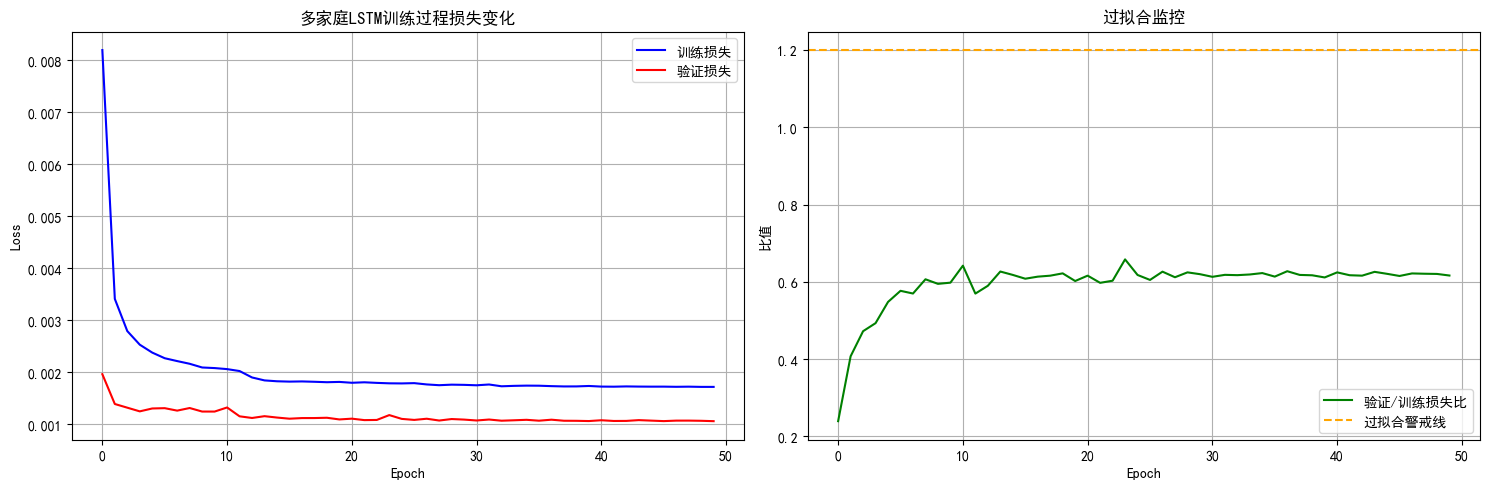


=== Â§öÂÆ∂Â∫≠LSTMËÆ≠ÁªÉÊÄªÁªì ===
ÊúÄÁªàËÆ≠ÁªÉÊçüÂ§±: 0.001718
ÊúÄÁªàÈ™åËØÅÊçüÂ§±: 0.001059
ÊúÄ‰Ω≥È™åËØÅÊçüÂ§±: 0.001059
ËøáÊãüÂêàÁ®ãÂ∫¶: 0.62 (Ê≠£Â∏∏)
Ê®°ÂûãÂ∑≤‰øùÂ≠ò‰∏∫: best_model_multihousehold.pth


In [4]:
# ËÆ≠ÁªÉÂæ™ÁéØ
num_epochs = 50  
train_losses = []
val_losses = []
best_val_loss = float('inf')
best_epoch = 0
patience_counter = 0
patience = 8

print(f"\nÂºÄÂßãËÆ≠ÁªÉÂ§öÂÆ∂Â∫≠LSTMÊ®°Âûã...")
print(f"ËÆ≠ÁªÉÈõÜÊ†∑Êú¨Êï∞: {len(train_dataset)}")
print(f"È™åËØÅÈõÜÊ†∑Êú¨Êï∞: {len(val_dataset)}")

for epoch in range(num_epochs):
    # ============ ËÆ≠ÁªÉÈò∂ÊÆµ ============
    model.train()
    train_loss = 0
    train_batches = 0
    
    # ËÆ≠ÁªÉËøõÂ∫¶Êù°
    train_pbar = tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs} [Train]', 
                      ncols=100, leave=False)
    for x, household_ids, y in train_pbar:
        x = x.to(device, non_blocking=True)
        household_ids = household_ids.to(device, non_blocking=True)
        y = y.to(device, non_blocking=True)
        
        optimizer.zero_grad()
        y_pred = model(x, household_ids).squeeze()
        loss = loss_fn(y_pred, y)
        loss.backward()
        # Ê¢ØÂ∫¶Ë£ÅÂâ™
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        
        train_loss += loss.item()
        train_batches += 1
        
        # Êõ¥Êñ∞ËøõÂ∫¶Êù°ÊòæÁ§∫ÂΩìÂâçloss
        train_pbar.set_postfix({'Loss': f'{loss.item():.6f}'})
    
    avg_train_loss = train_loss / train_batches
    
    # ============ È™åËØÅÈò∂ÊÆµ ============
    model.eval()
    val_loss = 0
    val_batches = 0
    
    # È™åËØÅËøõÂ∫¶Êù°
    val_pbar = tqdm(val_loader, desc=f'Epoch {epoch+1}/{num_epochs} [Val]', 
                    ncols=100, leave=False)
    with torch.no_grad():
        for x, household_ids, y in val_pbar:
            x = x.to(device, non_blocking=True)
            household_ids = household_ids.to(device, non_blocking=True)
            y = y.to(device, non_blocking=True)
            
            y_pred = model(x, household_ids).squeeze()
            loss = loss_fn(y_pred, y)
            val_loss += loss.item()
            val_batches += 1
            
            # Êõ¥Êñ∞È™åËØÅËøõÂ∫¶Êù°
            val_pbar.set_postfix({'Loss': f'{loss.item():.6f}'})
    
    avg_val_loss = val_loss / val_batches
    
    # Â≠¶‰π†ÁéáË∞ÉÂ∫¶
    scheduler.step(avg_val_loss)
    # ËÆ∞ÂΩïÊçüÂ§±
    train_losses.append(avg_train_loss)
    val_losses.append(avg_val_loss)
    
    # Êó©ÂÅúÊ£ÄÊü•
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        patience_counter = 0
        # ‰øùÂ≠òÊúÄ‰Ω≥Ê®°Âûã
        torch.save(model.state_dict(), 'best_model_multihousehold.pth')
        best_epoch = epoch + 1
    else:
        patience_counter += 1
    
    # ÊòæÁ§∫epochÁªìÊûú
    current_lr = optimizer.param_groups[0]['lr']
    print(f'Epoch {epoch+1}/{num_epochs} | Train Loss: {avg_train_loss:.6f} | Val Loss: {avg_val_loss:.6f} | LR: {current_lr:.6f}')
    
    # Êó©ÂÅú
    if patience_counter >= patience:
        print(f"Êó©ÂÅú‰∫éepoch {epoch+1}ÔºåÊúÄ‰Ω≥Ê®°ÂûãÂú®epoch {best_epoch}")
        break

print(f"\nËÆ≠ÁªÉÂÆåÊàêÔºÅ")
print(f"ÊúÄ‰Ω≥È™åËØÅÊçüÂ§±: {best_val_loss:.6f} (epoch {best_epoch})")

# Âä†ËΩΩÊúÄ‰Ω≥Ê®°Âûã
if best_epoch > 0:
    model.load_state_dict(torch.load('best_model_multihousehold.pth'))

# ÂèØËßÜÂåñËÆ≠ÁªÉËøáÁ®ã
plt.figure(figsize=(15, 5))
# ÊçüÂ§±Êõ≤Á∫ø
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='ËÆ≠ÁªÉÊçüÂ§±', color='blue')
plt.plot(val_losses, label='È™åËØÅÊçüÂ§±', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Â§öÂÆ∂Â∫≠LSTMËÆ≠ÁªÉËøáÁ®ãÊçüÂ§±ÂèòÂåñ')
plt.legend()
plt.grid(True)
# ËøáÊãüÂêàÂàÜÊûê
plt.subplot(1, 2, 2)
overfitting_ratio = [v/t if t > 0 else 1 for t, v in zip(train_losses, val_losses)]
plt.plot(overfitting_ratio, label='È™åËØÅ/ËÆ≠ÁªÉÊçüÂ§±ÊØî', color='green')
plt.axhline(y=1.2, color='orange', linestyle='--', label='ËøáÊãüÂêàË≠¶ÊàíÁ∫ø')
plt.xlabel('Epoch')
plt.ylabel('ÊØîÂÄº')
plt.title('ËøáÊãüÂêàÁõëÊéß')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# ÊÄßËÉΩÊÄªÁªì
print("\n=== Â§öÂÆ∂Â∫≠LSTMËÆ≠ÁªÉÊÄªÁªì ===")
print(f"ÊúÄÁªàËÆ≠ÁªÉÊçüÂ§±: {train_losses[-1]:.6f}")
print(f"ÊúÄÁªàÈ™åËØÅÊçüÂ§±: {val_losses[-1]:.6f}")
print(f"ÊúÄ‰Ω≥È™åËØÅÊçüÂ§±: {best_val_loss:.6f}")
print(f"ËøáÊãüÂêàÁ®ãÂ∫¶: {val_losses[-1]/train_losses[-1]:.2f} ({'Ê≠£Â∏∏' if val_losses[-1]/train_losses[-1] < 1.5 else 'ÂèØËÉΩËøáÊãüÂêà'})")
print(f"Ê®°ÂûãÂ∑≤‰øùÂ≠ò‰∏∫: best_model_multihousehold.pth")

=== ÂØπÊï¥‰∏™È™åËØÅÈõÜËøõË°åÂÖ®Èù¢È¢ÑÊµãÂàÜÊûê ===
Ê≠£Âú®Êî∂ÈõÜÈ™åËØÅÈõÜÈ¢ÑÊµãÁªìÊûú...
‚úÖ Êî∂ÈõÜÂÆåÊàêÔºåÂÖ± 17496 ‰∏™È¢ÑÊµãÊ†∑Êú¨
üìä Ë¶ÜÁõñ 10 ‰∏™‰∏çÂêåÂÆ∂Â∫≠
‚úÖ Êî∂ÈõÜÂÆåÊàêÔºåÂÖ± 17496 ‰∏™È¢ÑÊµãÊ†∑Êú¨
üìä Ë¶ÜÁõñ 10 ‰∏™‰∏çÂêåÂÆ∂Â∫≠


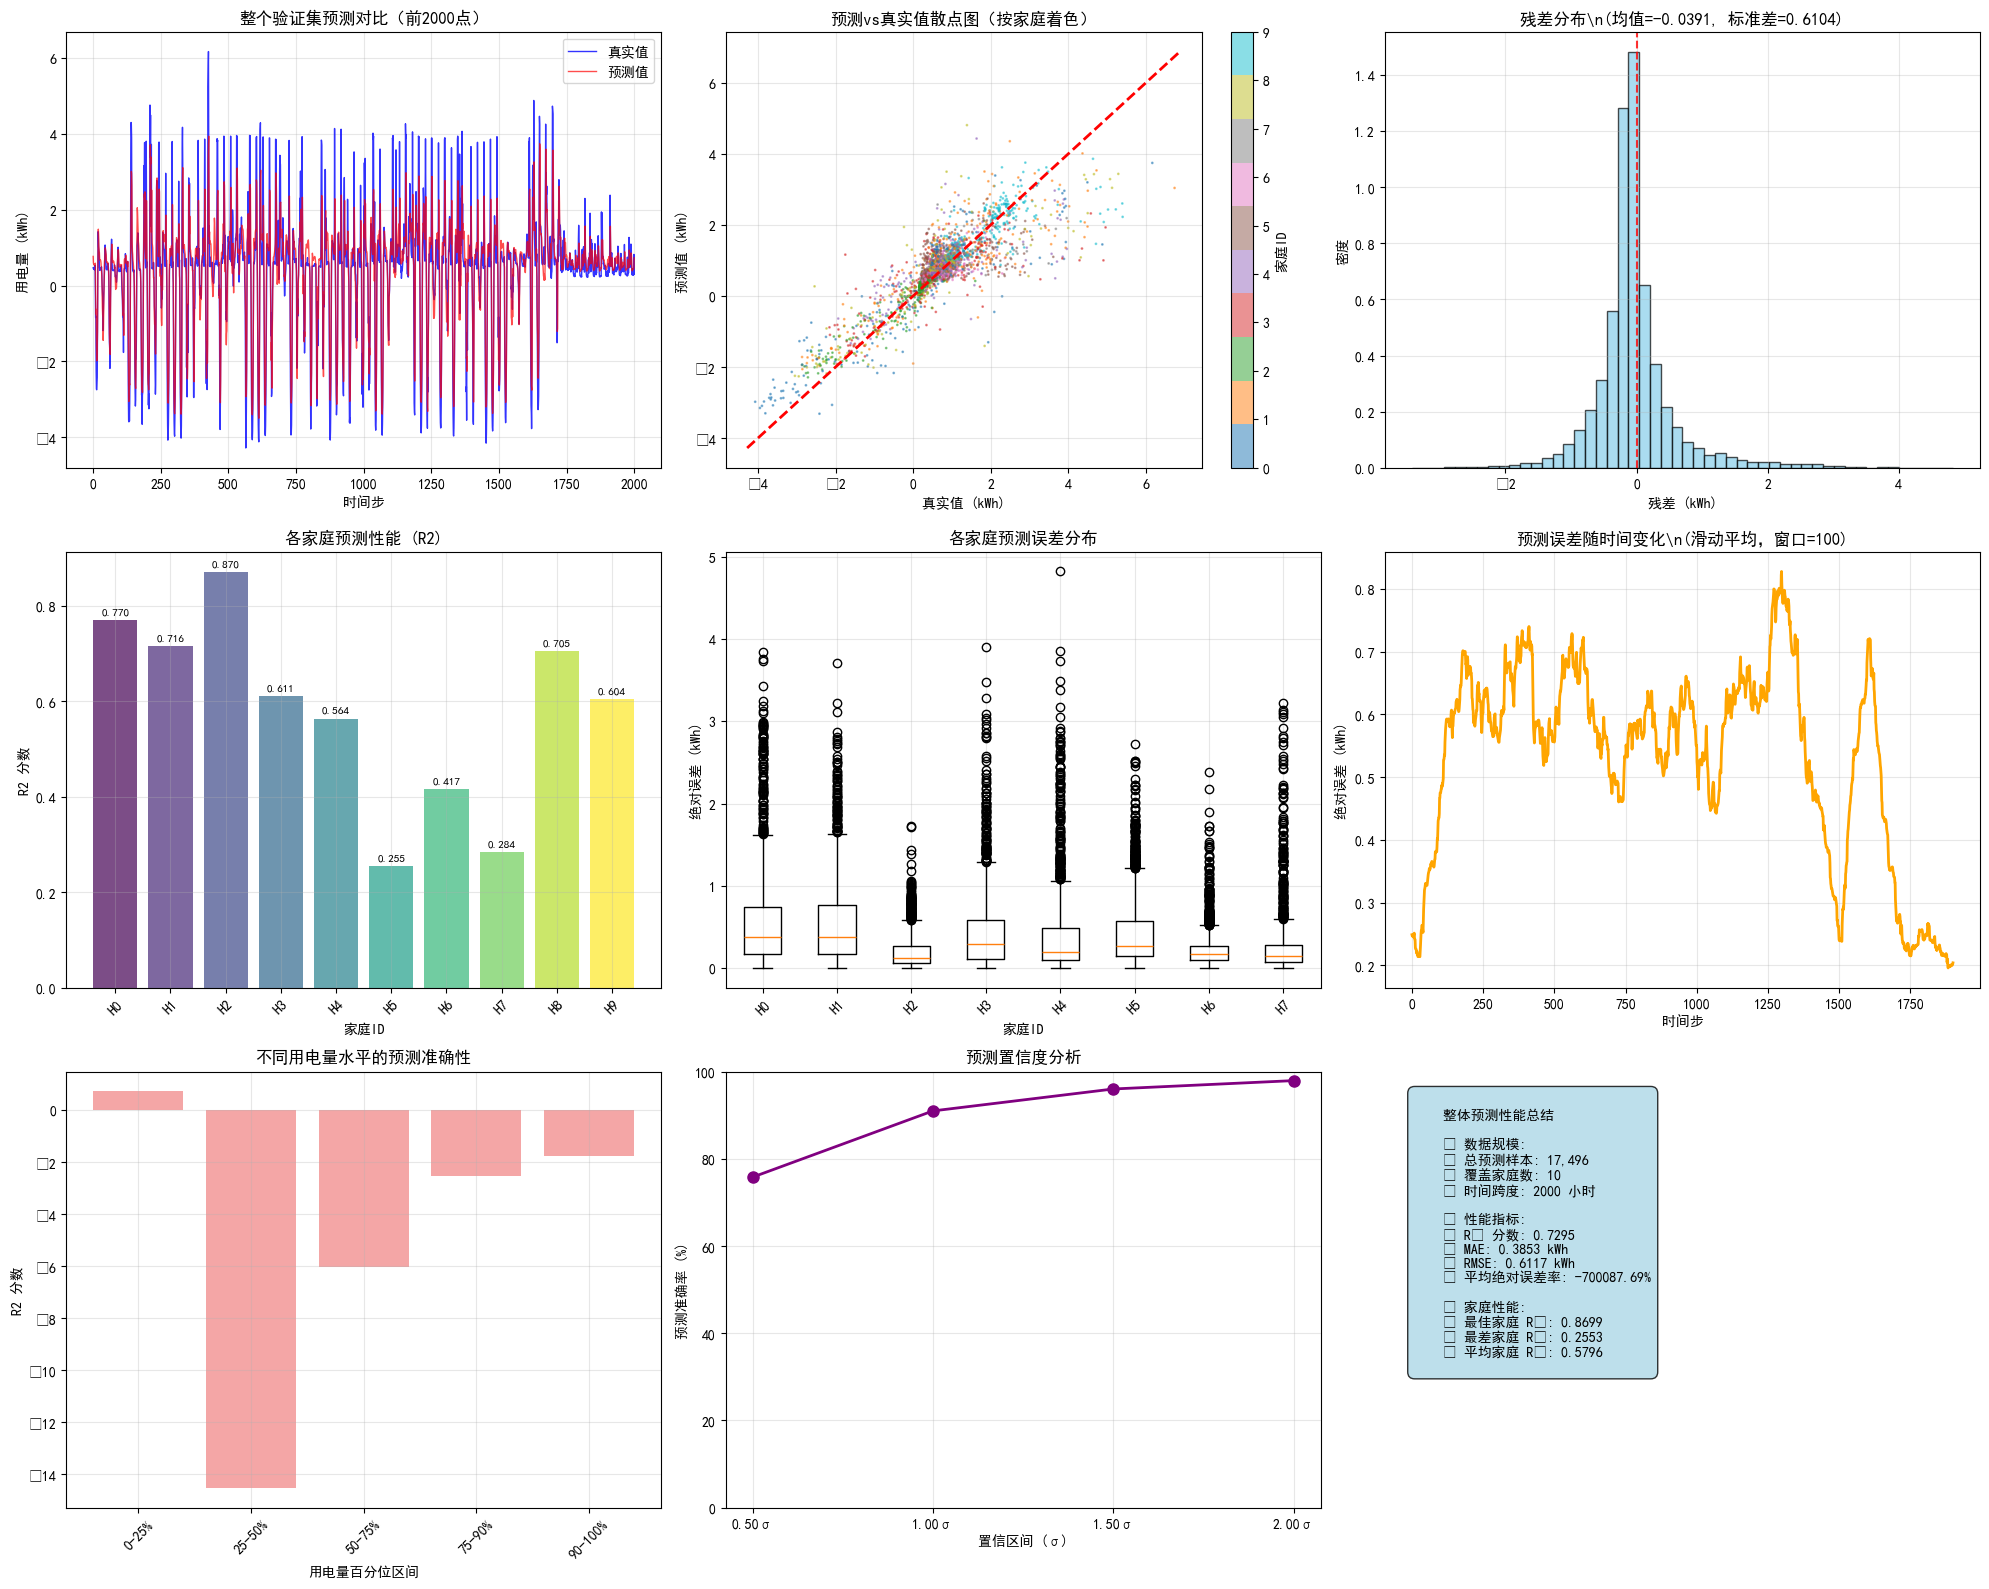

\n=== ËØ¶ÁªÜÂÆ∂Â∫≠Á∫ßÂà´ÂàÜÊûê ===


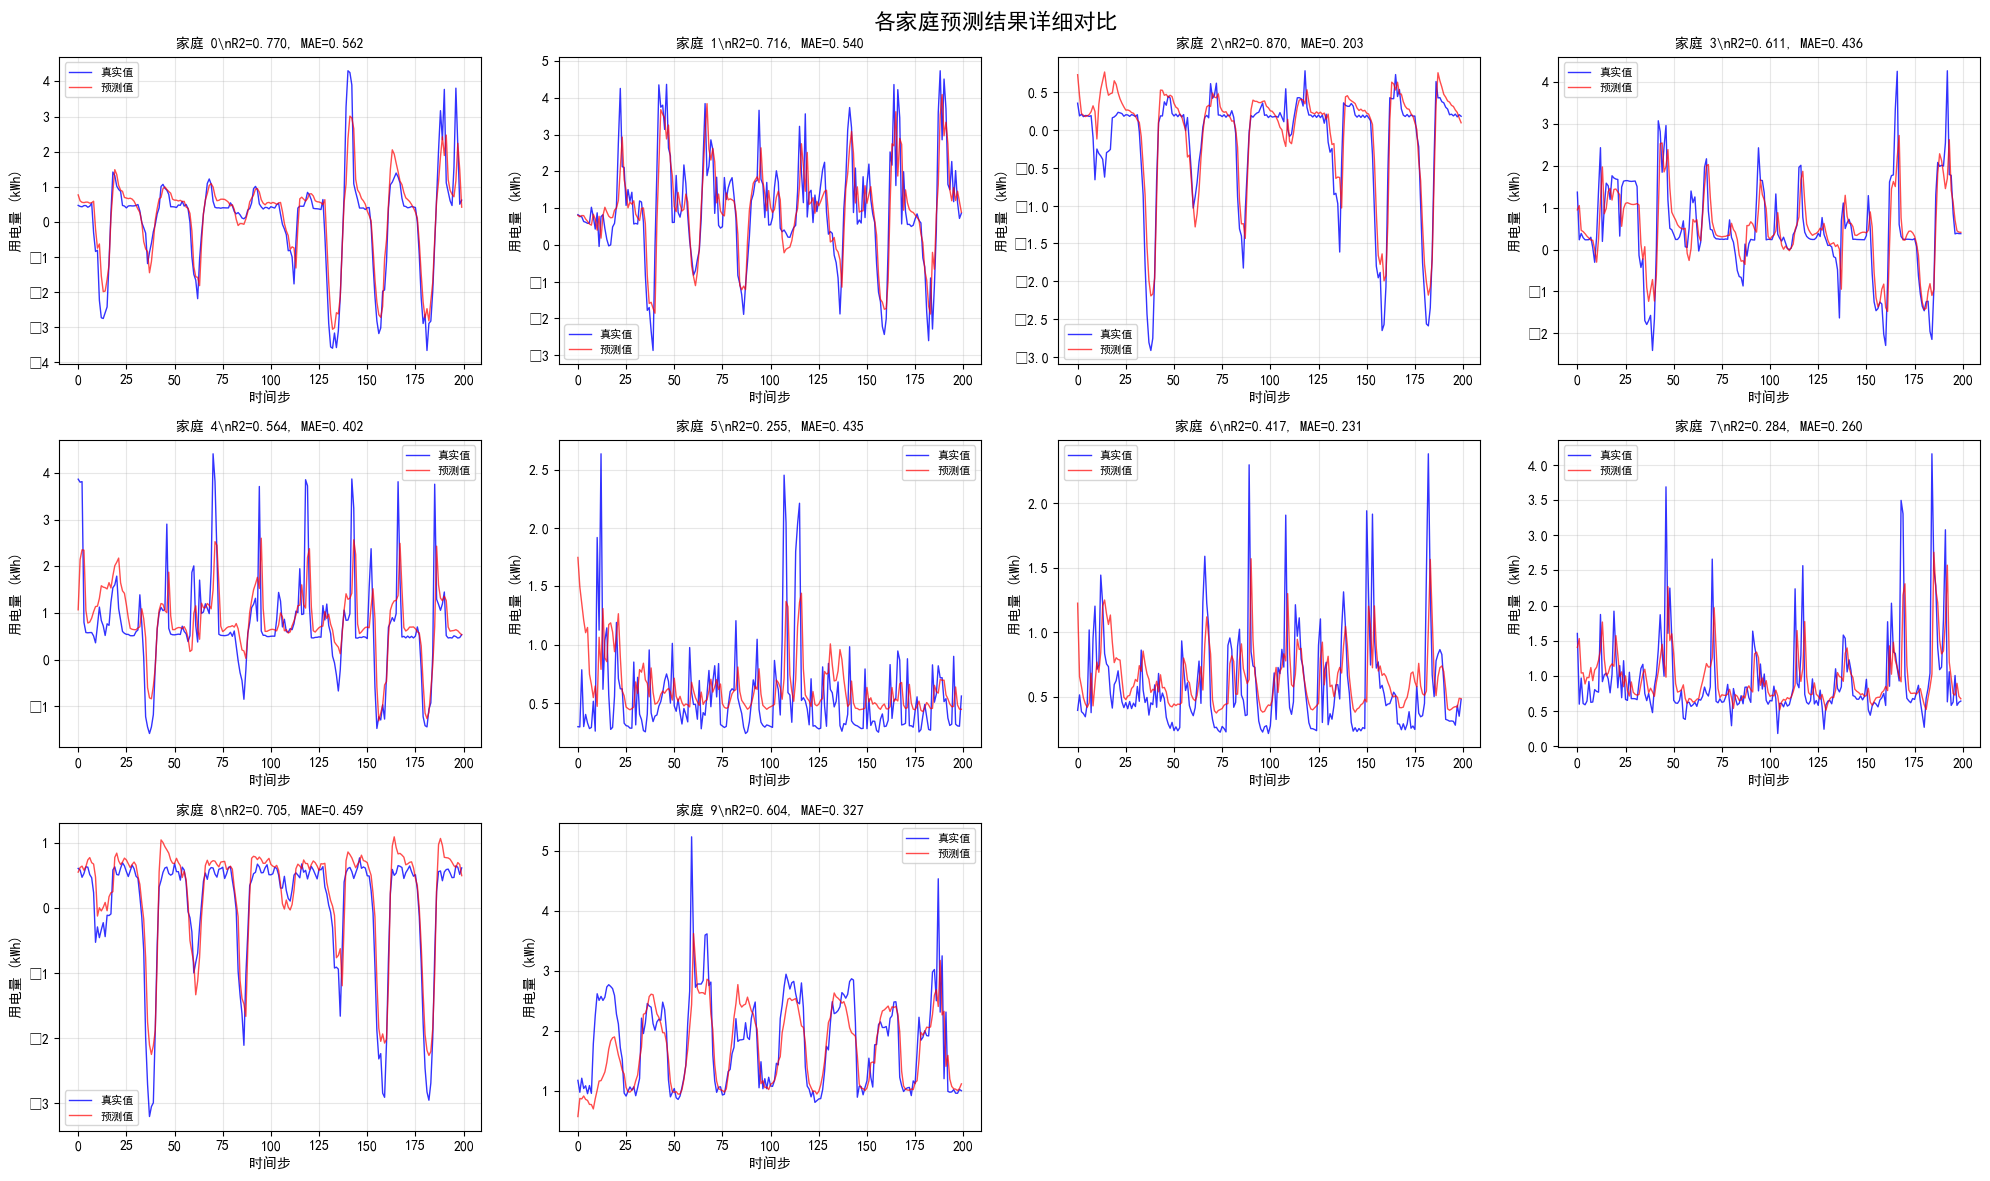

\n=== ËØ¶ÁªÜÊï∞ÂÄºÂàÜÊûêÊä•Âëä ===
ÂÆ∂Â∫≠ID     Ê†∑Êú¨Êï∞      R2ÂàÜÊï∞       MAE        RMSE       Âπ≥ÂùáÁî®Áîµ      
----------------------------------------------------------------------
0        1728     0.7697     0.5620     0.8172     0.3326    
1        1752     0.7164     0.5405     0.7424     0.8857    
2        1752     0.8699     0.2030     0.2959     -0.1194   
3        1752     0.6111     0.4365     0.6545     0.4646    
4        1752     0.5636     0.4018     0.6674     0.7148    
5        1752     0.2553     0.4348     0.6139     0.8913    
6        1752     0.4167     0.2308     0.3328     0.6501    
7        1752     0.2844     0.2600     0.4731     0.8679    
8        1752     0.7045     0.4590     0.7579     0.4497    
9        1752     0.6040     0.3268     0.5282     1.9373    
\n=== ÊÄª‰ΩìÁªüËÆ° ===
ÊÄª‰Ωì R2 ÂàÜÊï∞: 0.729491
ÊÄª‰Ωì MAE: 0.385273 kWh
ÊÄª‰Ωì RMSE: 0.611653 kWh
È¢ÑÊµãÂÄºËåÉÂõ¥: -3.5032 - 5.1703 kWh
ÁúüÂÆûÂÄºËåÉÂõ¥: -4.2882 - 6.8893 kWh
ÊÆãÂ∑ÆËåÉÂõ¥:

In [10]:
# ÂØπÊï¥‰∏™È™åËØÅÈõÜËøõË°åÂÖ®Èù¢È¢ÑÊµãÂàÜÊûêÂíåÂèØËßÜÂåñ
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from collections import defaultdict

warnings.filterwarnings('ignore')
# ËÆæÁΩÆ‰∏≠ÊñáÂ≠ó‰ΩìÔºåÁî®‰∫éÂõæË°®ÊòæÁ§∫
plt.rcParams['font.sans-serif'] = ['SimHei']
# ËÆæÁΩÆÊ≠£Â∏∏ÊòæÁ§∫Ë¥üÂè∑
plt.rcParams['axes.unicode_minus'] = True

print("=== ÂØπÊï¥‰∏™È™åËØÅÈõÜËøõË°åÂÖ®Èù¢È¢ÑÊµãÂàÜÊûê ===")

# Á°Æ‰øùÊ®°ÂûãÂ∑≤Âä†ËΩΩ
if 'model' not in locals() or 'val_loader' not in locals():
    print("‚ö†Ô∏è ËØ∑ÂÖàËøêË°åÂâçÈù¢ÁöÑËÆ≠ÁªÉÂíåËØÑ‰º∞ÂçïÂÖÉÊ†º")
else:
    # Á°Æ‰øùÊ®°ÂûãÂ§Ñ‰∫éËØÑ‰º∞Ê®°Âºè
    model.eval()
    
    # ÈáçÊñ∞Êî∂ÈõÜÈ™åËØÅÈõÜÁöÑÊâÄÊúâÈ¢ÑÊµãÁªìÊûúÔºåËøôÊ¨°ÂåÖÂê´Êõ¥Â§ö‰ø°ÊÅØ
    all_predictions = []
    all_targets = []
    all_household_ids = []
    all_sequences = []  # Â≠òÂÇ®ËæìÂÖ•Â∫èÂàó
    
    print("Ê≠£Âú®Êî∂ÈõÜÈ™åËØÅÈõÜÈ¢ÑÊµãÁªìÊûú...")
    with torch.no_grad():
        for batch_idx, (x, household_ids, y) in enumerate(val_loader):
            x = x.to(device)
            household_ids = household_ids.to(device)
            
            # Ëé∑ÂèñÈ¢ÑÊµã
            y_pred = model(x, household_ids).squeeze()
            
            # ËΩ¨Êç¢Âà∞CPUÂπ∂Â≠òÂÇ®
            all_predictions.extend(y_pred.cpu().numpy())
            all_targets.extend(y.numpy())
            all_household_ids.extend(household_ids.cpu().numpy())
            all_sequences.extend(x.cpu().numpy())
    
    # ËΩ¨Êç¢‰∏∫numpyÊï∞ÁªÑ
    all_predictions = np.array(all_predictions)
    all_targets = np.array(all_targets)
    all_household_ids = np.array(all_household_ids)
    all_sequences = np.array(all_sequences)
    
    # ÂèçÂΩí‰∏ÄÂåñÂà∞ÂéüÂßãÂ∞∫Â∫¶
    predictions_original = scaler.inverse_transform(all_predictions.reshape(-1, 1)).flatten()
    targets_original = scaler.inverse_transform(all_targets.reshape(-1, 1)).flatten()
    
    print(f"‚úÖ Êî∂ÈõÜÂÆåÊàêÔºåÂÖ± {len(predictions_original)} ‰∏™È¢ÑÊµãÊ†∑Êú¨")
    print(f"üìä Ë¶ÜÁõñ {len(np.unique(all_household_ids))} ‰∏™‰∏çÂêåÂÆ∂Â∫≠")
    
    # 1. ÂàõÂª∫ÁªºÂêàÂèØËßÜÂåñÂõæË°®
    plt.figure(figsize=(20, 16))
    
    # 1.1 Êï¥‰ΩìÈ¢ÑÊµãvsÁúüÂÆûÂÄºÊó∂Â∫èÂõæÔºàÊòæÁ§∫Ââç2000‰∏™ÁÇπÔºâ
    plt.subplot(3, 3, 1)
    display_points = min(2000, len(predictions_original))
    time_indices = np.arange(display_points)
    plt.plot(time_indices, targets_original[:display_points], 
             label='ÁúüÂÆûÂÄº', color='blue', alpha=0.8, linewidth=1)
    plt.plot(time_indices, predictions_original[:display_points], 
             label='È¢ÑÊµãÂÄº', color='red', alpha=0.7, linewidth=1)
    plt.xlabel('Êó∂Èó¥Ê≠•')
    plt.ylabel('Áî®ÁîµÈáè (kWh)')
    plt.title(f'Êï¥‰∏™È™åËØÅÈõÜÈ¢ÑÊµãÂØπÊØîÔºàÂâç{display_points}ÁÇπÔºâ')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 1.2 È¢ÑÊµãvsÁúüÂÆûÂÄºÊï£ÁÇπÂõæ
    plt.subplot(3, 3, 2)
    sample_indices = np.random.choice(len(predictions_original), 
                                     min(3000, len(predictions_original)), replace=False)
    plt.scatter(targets_original[sample_indices], predictions_original[sample_indices], 
               alpha=0.5, s=1, c=all_household_ids[sample_indices], cmap='tab10')
    plt.plot([targets_original.min(), targets_original.max()], 
             [targets_original.min(), targets_original.max()], 'r--', lw=2)
    plt.xlabel('ÁúüÂÆûÂÄº (kWh)')
    plt.ylabel('È¢ÑÊµãÂÄº (kWh)')
    plt.title('È¢ÑÊµãvsÁúüÂÆûÂÄºÊï£ÁÇπÂõæÔºàÊåâÂÆ∂Â∫≠ÁùÄËâ≤Ôºâ')
    plt.colorbar(label='ÂÆ∂Â∫≠ID')
    plt.grid(True, alpha=0.3)
    
    # 1.3 ÊÆãÂ∑ÆÂàÜÂ∏É
    plt.subplot(3, 3, 3)
    residuals = targets_original - predictions_original
    plt.hist(residuals, bins=50, alpha=0.7, color='skyblue', edgecolor='black', density=True)
    plt.axvline(x=0, color='red', linestyle='--', alpha=0.8)
    plt.xlabel('ÊÆãÂ∑Æ (kWh)')
    plt.ylabel('ÂØÜÂ∫¶')
    plt.title(f'ÊÆãÂ∑ÆÂàÜÂ∏É\\n(ÂùáÂÄº={np.mean(residuals):.4f}, Ê†áÂáÜÂ∑Æ={np.std(residuals):.4f})')
    plt.grid(True, alpha=0.3)
    
    # 1.4 ÊåâÂÆ∂Â∫≠ÂàÜÁªÑÁöÑÈ¢ÑÊµãÊÄßËÉΩ
    plt.subplot(3, 3, 4)
    unique_households = np.unique(all_household_ids)
    household_performance = {}
    
    for hid in unique_households:
        mask = all_household_ids == hid
        if np.sum(mask) > 10:  # Á°Æ‰øùÊúâË∂≥Â§üÊ†∑Êú¨
            h_targets = targets_original[mask]
            h_preds = predictions_original[mask]
            h_r2 = r2_score(h_targets, h_preds)
            h_mae = mean_absolute_error(h_targets, h_preds)
            household_performance[hid] = {'r2': h_r2, 'mae': h_mae, 'count': len(h_targets)}
    
    household_ids = list(household_performance.keys())
    r2_scores = [household_performance[hid]['r2'] for hid in household_ids]
    
    bars = plt.bar(range(len(household_ids)), r2_scores, 
                   color=plt.cm.viridis(np.linspace(0, 1, len(household_ids))), alpha=0.7)
    plt.xlabel('ÂÆ∂Â∫≠ID')
    plt.ylabel('R2 ÂàÜÊï∞')
    plt.title('ÂêÑÂÆ∂Â∫≠È¢ÑÊµãÊÄßËÉΩ (R2)')
    plt.xticks(range(len(household_ids)), [f'H{hid}' for hid in household_ids], rotation=45)
    plt.grid(True, alpha=0.3)
    
    # Ê∑ªÂä†Êï∞ÂÄºÊ†áÁ≠æ
    for i, (bar, score) in enumerate(zip(bars, r2_scores)):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                f'{score:.3f}', ha='center', va='bottom', fontsize=8)
    
    # 1.5 ËØØÂ∑ÆÂàÜÂ∏ÉÁÆ±Á∫øÂõæÔºàÊåâÂÆ∂Â∫≠Ôºâ
    plt.subplot(3, 3, 5)
    household_errors = []
    household_labels = []
    
    for hid in household_ids[:8]:  # Âè™ÊòæÁ§∫Ââç8‰∏™ÂÆ∂Â∫≠ÈÅøÂÖçÂõæË°®Ëøá‰∫éÊã•Êå§
        mask = all_household_ids == hid
        if np.sum(mask) > 10:
            errors = np.abs(targets_original[mask] - predictions_original[mask])
            household_errors.append(errors)
            household_labels.append(f'H{hid}')
    
    plt.boxplot(household_errors, labels=household_labels)
    plt.ylabel('ÁªùÂØπËØØÂ∑Æ (kWh)')
    plt.xlabel('ÂÆ∂Â∫≠ID')
    plt.title('ÂêÑÂÆ∂Â∫≠È¢ÑÊµãËØØÂ∑ÆÂàÜÂ∏É')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    
    # 1.6 È¢ÑÊµãËØØÂ∑ÆÈöèÊó∂Èó¥ÂèòÂåñ
    plt.subplot(3, 3, 6)
    abs_errors = np.abs(residuals)
    # ËÆ°ÁÆóÊªëÂä®Âπ≥ÂùáÊù•Âπ≥ÊªëËØØÂ∑ÆÊõ≤Á∫ø
    window_size = 100
    if len(abs_errors) > window_size:
        smoothed_errors = np.convolve(abs_errors, np.ones(window_size)/window_size, mode='valid')
        plt.plot(smoothed_errors[:display_points-window_size+1], color='orange', linewidth=2)
        plt.xlabel('Êó∂Èó¥Ê≠•')
        plt.ylabel('ÁªùÂØπËØØÂ∑Æ (kWh)')
        plt.title(f'È¢ÑÊµãËØØÂ∑ÆÈöèÊó∂Èó¥ÂèòÂåñ\\n(ÊªëÂä®Âπ≥ÂùáÔºåÁ™óÂè£={window_size})')
        plt.grid(True, alpha=0.3)
    
    # 1.7 ‰∏çÂêåÁî®ÁîµÈáèÊ∞¥Âπ≥ÁöÑÈ¢ÑÊµãÂáÜÁ°ÆÊÄß
    plt.subplot(3, 3, 7)
    # Â∞ÜÁúüÂÆûÂÄºÂàÜ‰∏∫‰∏çÂêåÂå∫Èó¥
    percentiles = [0, 25, 50, 75, 90, 100]
    quantiles = np.percentile(targets_original, percentiles)
    
    interval_r2 = []
    interval_labels = []
    
    for i in range(len(quantiles)-1):
        mask = (targets_original >= quantiles[i]) & (targets_original < quantiles[i+1])
        if np.sum(mask) > 10:
            interval_targets = targets_original[mask]
            interval_preds = predictions_original[mask]
            interval_r2.append(r2_score(interval_targets, interval_preds))
            interval_labels.append(f'{percentiles[i]}-{percentiles[i+1]}%')
    
    plt.bar(range(len(interval_r2)), interval_r2, color='lightcoral', alpha=0.7)
    plt.xlabel('Áî®ÁîµÈáèÁôæÂàÜ‰ΩçÂå∫Èó¥')
    plt.ylabel('R2 ÂàÜÊï∞')
    plt.title('‰∏çÂêåÁî®ÁîµÈáèÊ∞¥Âπ≥ÁöÑÈ¢ÑÊµãÂáÜÁ°ÆÊÄß')
    plt.xticks(range(len(interval_labels)), interval_labels, rotation=45)
    plt.grid(True, alpha=0.3)
    
    # 1.8 Ê®°ÂûãÈ¢ÑÊµãÁΩÆ‰ø°Â∫¶ÂàÜÊûê
    plt.subplot(3, 3, 8)
    # ËÆ°ÁÆóÈ¢ÑÊµãÁöÑÊ†áÂáÜÂ∑Æ‰Ωú‰∏∫‰∏çÁ°ÆÂÆöÊÄßÂ∫¶Èáè
    prediction_std = np.std(predictions_original)
    confidence_intervals = [prediction_std * i for i in [0.5, 1.0, 1.5, 2.0]]
    
    accuracy_within_ci = []
    for ci in confidence_intervals:
        within_ci = np.sum(np.abs(residuals) <= ci) / len(residuals) * 100
        accuracy_within_ci.append(within_ci)
    
    plt.plot([f'{ci:.2f}œÉ' for ci in [0.5, 1.0, 1.5, 2.0]], accuracy_within_ci, 
             marker='o', linewidth=2, markersize=8, color='purple')
    plt.xlabel('ÁΩÆ‰ø°Âå∫Èó¥ (œÉ)')
    plt.ylabel('È¢ÑÊµãÂáÜÁ°ÆÁéá (%)')
    plt.title('È¢ÑÊµãÁΩÆ‰ø°Â∫¶ÂàÜÊûê')
    plt.grid(True, alpha=0.3)
    plt.ylim(0, 100)
    
    # 1.9 Êï¥‰ΩìÊÄßËÉΩÊÄªÁªì
    plt.subplot(3, 3, 9)
    plt.axis('off')
    
    # ËÆ°ÁÆóÊï¥‰ΩìÊåáÊ†á
    overall_r2 = r2_score(targets_original, predictions_original)
    overall_mae = mean_absolute_error(targets_original, predictions_original)
    overall_mse = mean_squared_error(targets_original, predictions_original)
    overall_rmse = np.sqrt(overall_mse)
    
    # ÂàõÂª∫ÊÄßËÉΩÊÄªÁªìÊñáÊú¨
    summary_text = f"""
    Êï¥‰ΩìÈ¢ÑÊµãÊÄßËÉΩÊÄªÁªì
    
    üìä Êï∞ÊçÆËßÑÊ®°:
    ‚Ä¢ ÊÄªÈ¢ÑÊµãÊ†∑Êú¨: {len(predictions_original):,}
    ‚Ä¢ Ë¶ÜÁõñÂÆ∂Â∫≠Êï∞: {len(unique_households)}
    ‚Ä¢ Êó∂Èó¥Ë∑®Â∫¶: {display_points} Â∞èÊó∂
    
    üéØ ÊÄßËÉΩÊåáÊ†á:
    ‚Ä¢ R¬≤ ÂàÜÊï∞: {overall_r2:.4f}
    ‚Ä¢ MAE: {overall_mae:.4f} kWh
    ‚Ä¢ RMSE: {overall_rmse:.4f} kWh
    ‚Ä¢ Âπ≥ÂùáÁªùÂØπËØØÂ∑ÆÁéá: {np.mean(np.abs(residuals)/targets_original)*100:.2f}%
    
    üìà ÂÆ∂Â∫≠ÊÄßËÉΩ:
    ‚Ä¢ ÊúÄ‰Ω≥ÂÆ∂Â∫≠ R¬≤: {max(r2_scores):.4f}
    ‚Ä¢ ÊúÄÂ∑ÆÂÆ∂Â∫≠ R¬≤: {min(r2_scores):.4f}
    ‚Ä¢ Âπ≥ÂùáÂÆ∂Â∫≠ R¬≤: {np.mean(r2_scores):.4f}
    """
    
    plt.text(0.05, 0.95, summary_text, transform=plt.gca().transAxes, 
             fontsize=10, verticalalignment='top', 
             bbox=dict(boxstyle='round,pad=0.5', facecolor='lightblue', alpha=0.8))
    
    plt.tight_layout()
    plt.show()
    
    # 2. ÂàõÂª∫ËØ¶ÁªÜÁöÑÂÆ∂Â∫≠Á∫ßÂà´ÂàÜÊûê
    print("\\n=== ËØ¶ÁªÜÂÆ∂Â∫≠Á∫ßÂà´ÂàÜÊûê ===")
    
    plt.figure(figsize=(20, 12))
    
    # ‰∏∫ÊØè‰∏™ÂÆ∂Â∫≠ÂàõÂª∫Â≠êÂõæÔºàÊúÄÂ§öÊòæÁ§∫12‰∏™ÂÆ∂Â∫≠Ôºâ
    max_households_to_show = min(12, len(household_ids))
    cols = 4
    rows = (max_households_to_show + cols - 1) // cols
    
    for i, hid in enumerate(household_ids[:max_households_to_show]):
        plt.subplot(rows, cols, i+1)
        
        # Ëé∑ÂèñËØ•ÂÆ∂Â∫≠ÁöÑÊï∞ÊçÆ
        mask = all_household_ids == hid
        h_targets = targets_original[mask]
        h_preds = predictions_original[mask]
        
        # Âè™ÊòæÁ§∫Ââç200‰∏™ÁÇπÈÅøÂÖçÂõæË°®Ëøá‰∫éÂØÜÈõÜ
        display_len = min(200, len(h_targets))
        
        plt.plot(h_targets[:display_len], label='ÁúüÂÆûÂÄº', color='blue', alpha=0.8, linewidth=1)
        plt.plot(h_preds[:display_len], label='È¢ÑÊµãÂÄº', color='red', alpha=0.7, linewidth=1)
        
        # ËÆ°ÁÆóËØ•ÂÆ∂Â∫≠ÁöÑÊÄßËÉΩÊåáÊ†á
        h_r2 = r2_score(h_targets, h_preds)
        h_mae = mean_absolute_error(h_targets, h_preds)
        
        plt.title(f'ÂÆ∂Â∫≠ {hid}\\nR2={h_r2:.3f}, MAE={h_mae:.3f}', fontsize=10)
        plt.xlabel('Êó∂Èó¥Ê≠•')
        plt.ylabel('Áî®ÁîµÈáè (kWh)')
        plt.legend(fontsize=8)
        plt.grid(True, alpha=0.3)
    
    plt.suptitle('ÂêÑÂÆ∂Â∫≠È¢ÑÊµãÁªìÊûúËØ¶ÁªÜÂØπÊØî', fontsize=16, y=0.98)
    plt.tight_layout()
    plt.show()
    
    # 3. ÁîüÊàêËØ¶ÁªÜÁöÑÊï∞ÂÄºÊä•Âëä
    print("\\n=== ËØ¶ÁªÜÊï∞ÂÄºÂàÜÊûêÊä•Âëä ===")
    print(f"{'ÂÆ∂Â∫≠ID':<8} {'Ê†∑Êú¨Êï∞':<8} {'R2ÂàÜÊï∞':<10} {'MAE':<10} {'RMSE':<10} {'Âπ≥ÂùáÁî®Áîµ':<10}")
    print("-" * 70)
    
    for hid in sorted(household_ids):
        mask = all_household_ids == hid
        h_targets = targets_original[mask]
        h_preds = predictions_original[mask]
        
        h_r2 = r2_score(h_targets, h_preds)
        h_mae = mean_absolute_error(h_targets, h_preds)
        h_rmse = np.sqrt(mean_squared_error(h_targets, h_preds))
        h_mean_consumption = np.mean(h_targets)
        
        print(f"{hid:<8} {len(h_targets):<8} {h_r2:<10.4f} {h_mae:<10.4f} {h_rmse:<10.4f} {h_mean_consumption:<10.4f}")
    
    print("\\n=== ÊÄª‰ΩìÁªüËÆ° ===")
    print(f"ÊÄª‰Ωì R2 ÂàÜÊï∞: {overall_r2:.6f}")
    print(f"ÊÄª‰Ωì MAE: {overall_mae:.6f} kWh")
    print(f"ÊÄª‰Ωì RMSE: {overall_rmse:.6f} kWh")
    print(f"È¢ÑÊµãÂÄºËåÉÂõ¥: {predictions_original.min():.4f} - {predictions_original.max():.4f} kWh")
    print(f"ÁúüÂÆûÂÄºËåÉÂõ¥: {targets_original.min():.4f} - {targets_original.max():.4f} kWh")
    print(f"ÊÆãÂ∑ÆËåÉÂõ¥: {residuals.min():.4f} - {residuals.max():.4f} kWh")
    